In [ ]:
# Get the data
!wget "https://www.dropbox.com/s/oz81wawvxxgxq50/customerattritionprediction.zip?dl=0"

--2021-05-04 15:36:56--  https://www.dropbox.com/s/oz81wawvxxgxq50/customerattritionprediction.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/oz81wawvxxgxq50/customerattritionprediction.zip [following]
--2021-05-04 15:36:56--  https://www.dropbox.com/s/raw/oz81wawvxxgxq50/customerattritionprediction.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0df557ad84dc1e4da7b321a93b.dl.dropboxusercontent.com/cd/0/inline/BN2E0Xplfh1ZKALUm3GsZeRXGP3gZvRC-gTXl8RIkYr_yAav5s6ZoikYnvrlSUwa77HR947LBcwFgHqEH5US1a0ylgrh52qpLwdKzi-vuPQ1tI-H1tnq4khyvtpawAxmLW9zD__dAvSnc7ZDVY9I74lx/file# [following]
--2021-05-04 15:36:57--  https://uc0df557ad84dc1e4da7b321a93b.dl.dropboxusercontent.com/cd/0/inline/BN2E0Xplfh1ZKALUm3GsZeRXGP3g

In [ ]:
# Unzip the data
!unzip "/content/customerattritionprediction.zip?dl=0"

Archive:  /content/customerattritionprediction.zip?dl=0
  inflating: Sample Submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("/content/train.csv")

In [ ]:
test = pd.read_csv("/content/test.csv")

In [ ]:
train_copy = train.copy()

In [ ]:
# first 5 rows
train_copy.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [ ]:
# Check dtypes, number of non-null values using .info() function
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [ ]:
train_copy.isnull().sum()

ID                      0
sex                     0
Aged                    0
Married                 0
TotalDependents         0
ServiceSpan             0
MobileService           0
4GService               0
CyberProtection         0
HardwareSupport         0
TechnicalAssistance     0
FilmSubscription        0
SettlementProcess       0
QuarterlyPayment        0
GrandPayment           10
CustomerAttrition       0
dtype: int64

In [ ]:
test.isnull().sum()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           1
dtype: int64

In [ ]:
# Check for class imabalance
train_copy['CustomerAttrition'].value_counts()

No     4658
Yes    1680
Name: CustomerAttrition, dtype: int64

In [ ]:
# Percentage representation of each class
pos_class = train_copy['CustomerAttrition'].value_counts().loc['Yes']/train_copy.shape[0] # Fraction of total positive classes divided by total number of data points
neg_class = train_copy['CustomerAttrition'].value_counts().loc['No']/train_copy.shape[0] # Fraction of total Negative classes divided by total number of data points

# Print the percentages
print("=== Percentage Representation of each class ===")
print("Positive Class (Yes) {:.2f} %".format(float(pos_class)*100))
print("Negative Class (No) {:.2f} %".format(float(neg_class)*100))

=== Percentage Representation of each class ===
Positive Class (Yes) 26.51 %
Negative Class (No) 73.49 %


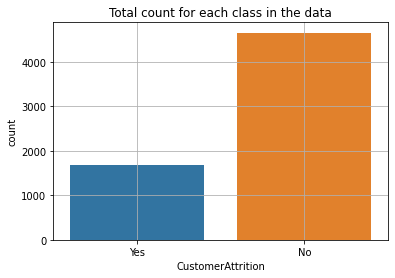

In [ ]:
import seaborn as sns
import plotly.express as px # Some more visualisation libraries

# plot the countplot using seaborn
sns.countplot(data = train_copy, x = 'CustomerAttrition')
plt.grid()
plt.title('Total count for each class in the data')
plt.show()

In [ ]:
fig = px.pie(train_copy, names = 'CustomerAttrition', title = "Representation of each class in the data")
fig.show()

**Class imbalance can be observed**


*   Solving problem without oversampling techniques
*   Solving problem using Smote



In [ ]:
# Describe the data
train_copy.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,6338.000000,6338.000000,6328.000000
mean,31.946040,64.814490,2290.544207
std,24.559659,30.191091,2265.181098
min,-2.000000,16.504109,16.297961
25%,8.000000,35.645524,401.849530
50%,29.000000,70.534085,1407.589119
75%,55.000000,90.058498,3823.855846
max,73.000000,120.159190,8685.848657


**In the column. 'ServiceSpan' the min value is -2.0 which doesn't seem right because time span cannot be negative.**

In [ ]:
# Split the data into categorical and numerical columns
cat_cols = train_copy.select_dtypes('object').columns
num_cols = [cols for cols in train_copy.columns if cols not in cat_cols]

In [ ]:
# Dealing with the numerical columns
train_copy[num_cols]

,ServiceSpan,QuarterlyPayment,GrandPayment
0,48,96.259802,4628.129119
1,45,18.876470,922.085998
2,59,106.016057,6205.891129
3,14,80.108839,1248.655391
4,25,51.529773,1285.321277
...,...,...,...
6333,3,100.391595,441.914530
6334,-1,44.782165,45.308180
6335,18,35.941713,552.181341
6336,46,94.762984,4563.812326


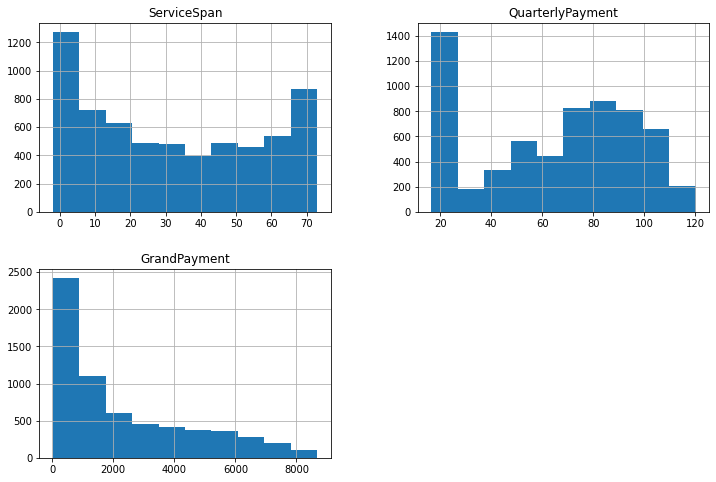

In [ ]:
train_copy[num_cols].hist(figsize=(12,8))
plt.show()

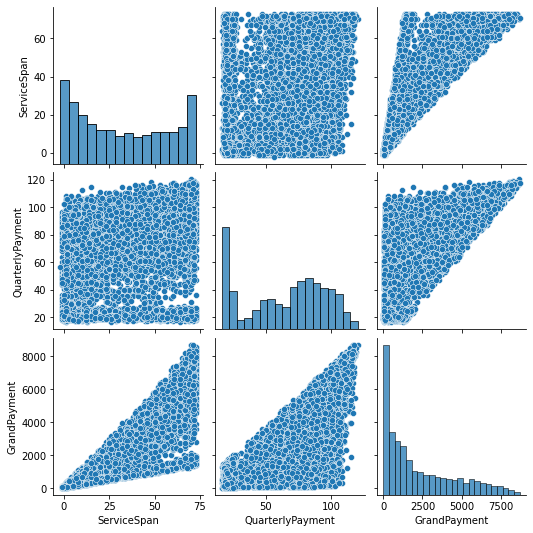

In [ ]:
# Plot the numerical data
sns.pairplot(train_copy[num_cols])
plt.show()

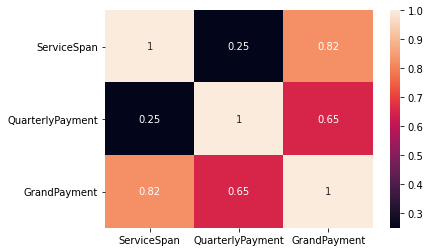

In [ ]:
# Observe the correlation
corr_matrix = train_copy.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()



*   No negative correlation is observed
*   GrandPayment and ServiceSpan have the highest correlation
*   GrandPayment and QuaterlyPayment also have correlation





In [ ]:
test[num_cols].describe() # Check the numerical columns of the testing set

,ServiceSpan,QuarterlyPayment,GrandPayment
count,705.000000,705.000000,704.000000
mean,31.297872,64.468277,2218.037902
std,24.763697,29.700384,2281.825459
min,-1.000000,16.294809,17.990729
25%,8.000000,39.405231,394.886730
50%,26.000000,70.130907,1352.995189
75%,56.000000,88.152665,3544.305882
max,73.000000,118.366287,8545.742035


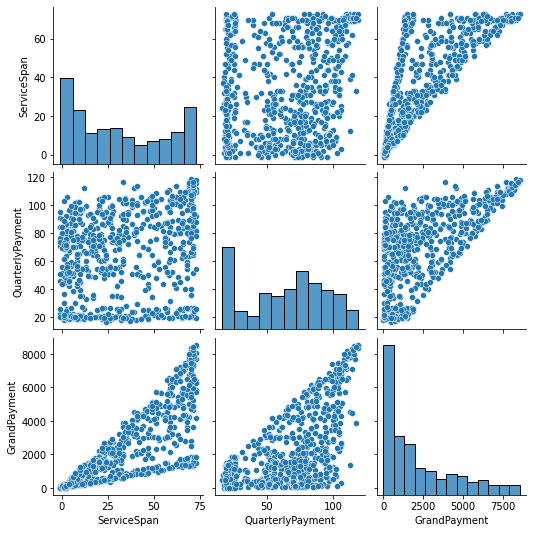

In [ ]:
sns.pairplot(test[num_cols]) #--> Visualise the testing set as well

**Similar patterns, as observed in the train set can be observed.**

**Creating a new dataset to impute the null values**

In [ ]:
# Drop the id and the Customer attrition column and join the train and test set
test_copy_1 = test.copy() #--> Copy the test set
combined_dataframe = pd.concat((train_copy.drop(['ID', 'CustomerAttrition'], axis=1), test_copy_1.drop('ID', axis=1))) # Create a new dataframe
combined_dataframe = combined_dataframe.reset_index()
combined_dataframe.drop('index', axis=1, inplace=True)
combined_dataframe.head(5)

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
0,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119
1,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998
2,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129
3,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391
4,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277


In [ ]:
train[train['GrandPayment'].isnull()==True].index

Int64Index([643, 1169, 1186, 2281, 3611, 3918, 5579, 5742, 5796, 6203], dtype='int64')

In [ ]:
null_indices = combined_dataframe[combined_dataframe['GrandPayment'].isnull() == True].index # ---> Extract the null indexes

In [ ]:
(null_indices)

Int64Index([643, 1169, 1186, 2281, 3611, 3918, 5579, 5742, 5796, 6203, 6870], dtype='int64')

In [ ]:
# Split the data into X and y
X_1 = combined_dataframe.drop('GrandPayment', axis=1)
y_1 = combined_dataframe['GrandPayment']

# encode the categorical columns
boolean_cols = ["Aged",	"Married",	"TotalDependents", "MobileService", "CyberProtection",	"HardwareSupport",	"TechnicalAssistance",	"FilmSubscription"]
nominal_cols = ['sex', '4GService', 'SettlementProcess']

# Label encode the boolean columns
from sklearn.preprocessing import LabelEncoder

# Label Encoder object
le = LabelEncoder()

for column in boolean_cols:
  X_1[column] = le.fit_transform(X_1[column].values.reshape((-1,1))) # Fit the Label Encoder on the boolean columns

# One Hot encode the nominal_cols
X_1 = pd.concat((X_1, pd.get_dummies(X_1[nominal_cols])), axis=1)
X_1.drop(nominal_cols, axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Normalise the data using standard scaler
from sklearn.preprocessing import MinMaxScaler

# Model object
ss = MinMaxScaler()

for column in X_1.columns:
  X_1[column] = ss.fit_transform(X_1[column].values.reshape((-1,1))) #---> Fit the standard scaler

In [ ]:
# Drop the null indices and create a training set
X_1_train = X_1.drop(null_indices, axis=0)
y_1_train = y_1.drop(null_indices, axis=0)

# Create the testing set
X_1_test = X_1.iloc[null_indices]

In [ ]:
# Split the training set
from sklearn.model_selection import train_test_split
Xt1, Xv1, yt1, yv1 = train_test_split(X_1_train, y_1_train, test_size=0.2, random_state=42)

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestRegressor

# model object
rf_model = RandomForestRegressor()

# fit the default model
rf_model.fit(Xt1, yt1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Check the score on validation set
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(rf_model, Xv1, yv1, cv=3, n_jobs=-1)

In [ ]:
cv_score.mean() # Amazing!!!!

0.9960348746787533

In [ ]:
# Making predicitons and imputing the null values
gp_predictions = rf_model.predict(X_1_test)

In [ ]:
gp_predictions

array([ 43.17221296, 173.08724805,  91.56653747,  35.4867028 ,
        28.86476239,  27.47630419,  65.56215021,  66.6605256 ,
        27.74956696,  26.83502571, 179.23431623])

In [ ]:
y_1.iloc[null_indices] = gp_predictions
y_1.iloc[null_indices]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



643      43.172213
1169    173.087248
1186     91.566537
2281     35.486703
3611     28.864762
3918     27.476304
5579     65.562150
5742     66.660526
5796     27.749567
6203     26.835026
6870    179.234316
Name: GrandPayment, dtype: float64

In [ ]:
# append the above values in the combined_dataset
combined_dataframe['GrandPayment'].iloc[null_indices] = gp_predictions

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
combined_dataframe.iloc[null_indices]

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
643,Female,No,Yes,Yes,1,Yes,No,No,No,No,Yes,Check,24.055624,43.172213
1169,Male,No,Yes,Yes,1,Yes,Wifi Broadband,No,Yes,Yes,Yes,Check,73.051308,173.087248
1186,Female,No,Yes,Yes,-1,Yes,Satellite Broadband,Yes,Yes,No,No,Check,80.233357,91.566537
2281,Female,No,Yes,Yes,1,Yes,No,No,No,No,No,Check,20.607275,35.486703
3611,Male,No,Yes,Yes,-1,Yes,Satellite Broadband,No,No,No,No,Check,26.212375,28.864762
3918,Male,No,Yes,Yes,0,Yes,Satellite Broadband,No,No,No,Yes,Check,19.918643,27.476304
5579,Male,No,Yes,Yes,0,Yes,Wifi Broadband,Yes,Yes,Yes,No,Bank,51.669205,65.562150
5742,Female,No,Yes,Yes,-2,Yes,Wifi Broadband,Yes,Yes,Yes,No,Card,56.157994,66.660526
5796,Male,No,Yes,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.075335,27.749567
6203,Male,No,No,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.687134,26.835026


In [ ]:
combined_dataframe.isnull().sum()

sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           0
dtype: int64

In [ ]:
# Split the data back into train and test
train_len = train_copy.shape[0]
training_set = combined_dataframe.iloc[ : train_len]
testing_set = combined_dataframe.iloc[train_len : ]

In [ ]:
testing_set = testing_set.reset_index()

In [ ]:
testing_set.drop('index', axis=1, inplace=True)

In [ ]:
# make changes in the original data
train_copy[training_set.columns] = training_set

In [ ]:
test[testing_set.columns] = testing_set

In [ ]:
test.isnull().sum()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           0
dtype: int64

In [ ]:
test

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
0,WMORTPCG3HTIPEFSGUFY,Male,No,No,No,8,Yes,Wifi Broadband,No,No,No,Yes,Check,21.299937,151.092519
1,GBLPEA16C3KGBO57KEFO,Female,No,No,No,26,Yes,Satellite Broadband,No,Yes,No,Yes,Check,56.609623,1553.276979
2,IDCQS0CO5P29AMKY3LO1,Male,No,No,No,66,Yes,Satellite Broadband,No,No,No,Yes,Card,25.167690,1684.262416
3,1IY29SDITYU6IFZ4KJB0,Female,Yes,No,No,31,Yes,Satellite Broadband,No,No,Yes,Yes,Bank,55.560968,1829.874462
4,T5XMW5B0YPCONH30WJD2,Female,No,Yes,Yes,21,Yes,Satellite Broadband,No,No,No,No,Bank,20.070002,489.818170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,Female,No,Yes,No,67,Yes,Satellite Broadband,No,Yes,Yes,No,Card,109.033026,7345.910050
701,WS1T1FLY87G9A1UNKST4,Male,No,No,No,2,Yes,Wifi Broadband,No,No,No,No,Card,71.468072,130.565363
702,0XG96FS1KXZSULPSGA1X,Female,No,Yes,No,22,Yes,Wifi Broadband,No,Yes,No,Yes,Electronic,102.930468,2392.842382
703,YR858QHNQMCDBCT9JRP6,Female,No,No,No,4,Yes,Wifi Broadband,No,No,No,No,Electronic,51.862869,263.231362


In [ ]:
# Concat the training and testing numerical columns before preprocessing
test_copy = test.copy() #--> Copy the test set

# Store the length of the training data
train_len = train_copy.shape[0]
combined_num_data = pd.concat((train_copy[num_cols], test_copy[num_cols]), axis=0)
combined_num_data = combined_num_data.reset_index()
combined_num_data.drop('index', axis=1, inplace=True)

In [ ]:
combined_num_data.head(10)

,ServiceSpan,QuarterlyPayment,GrandPayment
0,48,96.259802,4628.129119
1,45,18.876470,922.085998
2,59,106.016057,6205.891129
3,14,80.108839,1248.655391
4,25,51.529773,1285.321277
5,27,96.384275,2650.779905
6,53,17.291325,1032.254126
7,0,70.062808,70.934345
8,1,70.113661,134.880429
9,46,112.740780,5032.993657


**Repeating the visualisation steps for the combined set**

In [ ]:
combined_num_data.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,7043.000000,7043.000000,7043.000000
mean,31.881159,64.779835,2279.827931
std,24.579160,30.140426,2266.710678
min,-2.000000,16.294809,16.297961
25%,8.000000,35.747216,398.506357
50%,28.000000,70.503715,1394.942999
75%,55.000000,89.934436,3786.546607
max,73.000000,120.159190,8685.848657


In [ ]:
combined_num_data.isnull().sum()

ServiceSpan         0
QuarterlyPayment    0
GrandPayment        0
dtype: int64

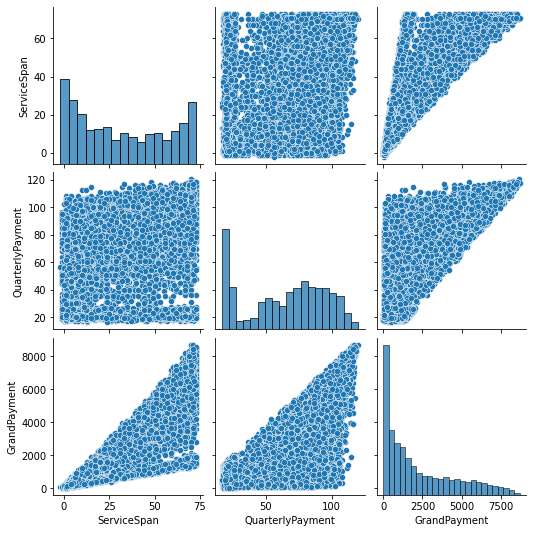

In [ ]:
sns.pairplot(combined_num_data)
plt.show()

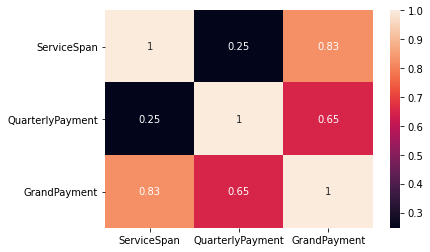

In [ ]:
# Visualisng the correlation values
sns.heatmap(combined_num_data.corr(), annot=True)
plt.show()

**Same results can be observed**

In [ ]:
# Checking for outliers

'''ServiceSpan has some negative values, which seem wrong.'''

# Check for outliers i.e data points lying outside the +-3 standard deviations
def check_outliers(data, threshold = 3.0):

  # Steps:
  # 1. Compute the Z score.
  # 2. Compare the Z score with the threshold.
  # 3. If the Z score > threshold, then store the index in a list.

  outlier_index = [] #---> List for storing the outlier's index
  Z_scores = [] #---> List for storing the Z scores

  u = data.mean() #--> Compute the mean for Z score calculation
  stdev = data.std() #--> Compute the std for Z score calculation
  
  # iterate over the data points, compute the z score and compare with the theshold
  for i, val in zip(data.index, data.values):

    Z = (val-u)/stdev #---> Compute the Z score
    Z_scores.append(Z) #---> Append the Z-scores
    if np.abs(Z) > threshold: #---> Compare the Z score with threshold values
        outlier_index.append(i) #---> Append the index of the outlier
    
  return Z_scores, outlier_index


In [ ]:
# Check for outliers in the combined dataset
columns_list = ["ServiceSpan",	"QuarterlyPayment",	"GrandPayment"] #--->List contianing the numerical columns
ss_z_scores, ss_outliers = check_outliers(combined_num_data[columns_list[0]]) #---> Checking for outliers for 'ServiceSpan' column
qp_z_scores, qp_outliers = check_outliers(combined_num_data[columns_list[1]]) #---> Checking for outliers for 'QuaterlyPayment' column
gp_z_scores, gp_outliers = check_outliers(combined_num_data[columns_list[2]]) #---> Checking for outliers for 'GrandPayment' column


In [ ]:
ss_outliers

[]

In [ ]:
qp_outliers

[]

In [ ]:
gp_outliers

[]

**No outliers observed.**

In [ ]:
# Checking for those indexes where the 'ServiceSpan' is <0

less_than_0 = [] #---> list for storing the negative service span index
for i, val in zip(combined_num_data['ServiceSpan'].index, combined_num_data['ServiceSpan'].values):
  if val < 0 :
    less_than_0.append(i) #---> Append the indexes with negative values

In [ ]:
len(less_than_0)

151

In [ ]:
combined_num_data.iloc[less_than_0]

,ServiceSpan,QuarterlyPayment,GrandPayment
51,-1,49.402192,49.384029
53,-1,25.009332,24.269131
74,-1,25.134435,23.873992
88,-1,50.478363,51.118120
104,-1,45.155888,44.946036
...,...,...,...
6842,-1,90.444311,87.615235
6876,-1,73.691435,73.912588
6921,-1,50.876482,50.411384
6967,-1,84.594734,84.329593


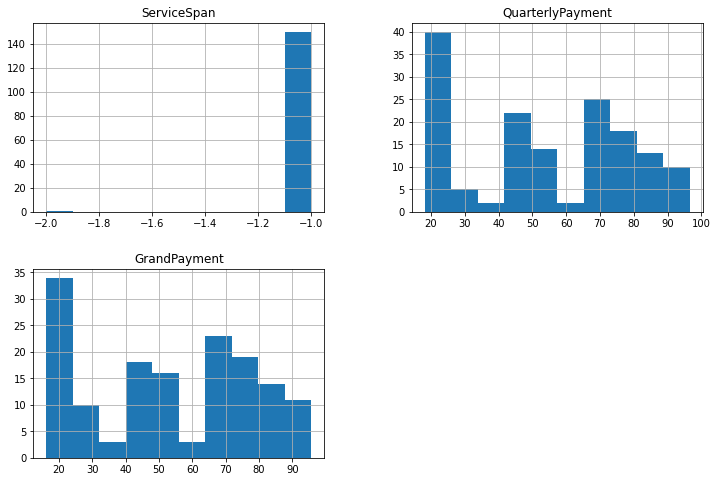

In [ ]:
combined_num_data.iloc[less_than_0].hist(figsize=(12,8))
plt.show()

**Negative service span but positive QuaterlyPayment and positive GrandPayment, seems absurd.**

**Approach to deal with the above case: Since, these are numerical columns. Use regression to impute the negative values.**

In [ ]:
train_set_1 = combined_num_data.drop(less_than_0, axis=0)

In [ ]:
test_set_1 = combined_num_data.iloc[less_than_0]

In [ ]:
# Split the train_set_1 into X and y and then into train and validation set
X_set_1 = train_set_1.drop('ServiceSpan', axis=1)
y_set_1 = train_set_1['ServiceSpan']

In [ ]:
from sklearn.model_selection import train_test_split
Xt, Xv, yt, yv = train_test_split(X_set_1, y_set_1, test_size=0.1, random_state=42) #---> Split the data

Random Forest uses bootstrap sampling and feature sampling, i.e row sampling and column sampling. Therefore Random Forest is not affected by multicollinearity that much since it is picking different set of features for different models and of course every model sees a different set of data points.

In [ ]:
Xt.isnull().sum()

QuarterlyPayment    0
GrandPayment        0
dtype: int64

In [ ]:
# Since, there is multicolinearity in the data, Linear Regression cannot be perfromed
from sklearn.ensemble import RandomForestRegressor

# Model object
rf_model = RandomForestRegressor()

# Fit the default model
rf_model.fit(Xt, yt)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Check performance on the validation set
cv_score_1 = cross_val_score(rf_model, Xv, yv)
cv_score_1.mean()

0.9899366316711052

In [ ]:
ss_predictions = rf_model.predict(test_set_1.drop(['ServiceSpan'], axis=1)) #---> Make predictions

In [ ]:
test_set_1['ServiceSpan'] = ss_predictions # replace the values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_set_1

,ServiceSpan,QuarterlyPayment,GrandPayment
51,1.62,49.402192,49.384029
53,0.61,25.009332,24.269131
74,0.78,25.134435,23.873992
88,1.35,50.478363,51.118120
104,0.58,45.155888,44.946036
...,...,...,...
6842,1.19,90.444311,87.615235
6876,1.26,73.691435,73.912588
6921,0.04,50.876482,50.411384
6967,0.05,84.594734,84.329593


In [ ]:
combined_num_data.iloc[less_than_0,0] = test_set_1['ServiceSpan'] #---> Replace the values

In [ ]:
combined_num_data.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,7043.000000,7043.000000,7043.000000
mean,31.924211,64.779835,2279.827931
std,24.523287,30.140426,2266.710678
min,0.000000,16.294809,16.297961
25%,8.000000,35.747216,398.506357
50%,28.000000,70.503715,1394.942999
75%,55.000000,89.934436,3786.546607
max,73.000000,120.159190,8685.848657


In [ ]:
train_copy[combined_num_data.columns] = combined_num_data.iloc[ : train_len]

In [ ]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   float64
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6338 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [ ]:
# Split back into trainig and testing set
testing_set_2 = combined_num_data.iloc[train_len : ]
testing_set_2 = testing_set_2.reset_index()
testing_set_2.drop('index', axis=1, inplace=True)

In [ ]:
test[testing_set_2.columns] = testing_set_2

In [ ]:
test.isnull().sum()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           0
dtype: int64

In [ ]:
test.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,705.000000,705.000000,705.000000
mean,31.339050,64.468277,2215.145982
std,24.711535,29.700384,2281.496781
min,0.000000,16.294809,17.990729
25%,8.000000,39.405231,390.188330
50%,26.000000,70.130907,1351.104544
75%,56.000000,88.152665,3544.231382
max,73.000000,118.366287,8545.742035


**Preprocessing Categorical Data**

In [ ]:
train_copy.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48.0,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45.0,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59.0,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14.0,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25.0,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


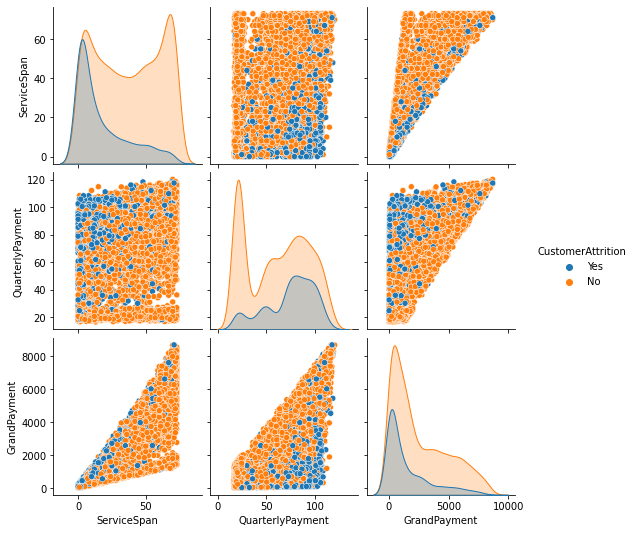

In [ ]:
# Combined pairplot
sns.pairplot(train_copy, hue = 'CustomerAttrition')
plt.show()

In [ ]:
train_copy['ServiceSpan'].describe()

count    6338.000000
mean       31.989301
std        24.503357
min         0.000000
25%         8.000000
50%        29.000000
75%        55.000000
max        73.000000
Name: ServiceSpan, dtype: float64

In [ ]:
# Encode the categorical columns
le2 = LabelEncoder()

for col in boolean_cols:
  train_copy[col] = le2.fit_transform(train_copy[col].values.reshape((-1,1)))
  test[col] = le2.transform(test[col].values.reshape((-1,1)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# One hot encode the nominal cols
train_copy = pd.concat((train_copy, pd.get_dummies(train_copy[nominal_cols], drop_first=True)), axis=1)
test = pd.concat((test, pd.get_dummies(test[nominal_cols], drop_first=True)), axis=1)

In [ ]:
train_copy = train_copy.drop(nominal_cols, axis=1)

In [ ]:
train_copy

,ID,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,CustomerAttrition,sex_Male,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,B60LHTZLLPFU4IULNPUF,0,0,1,48.00,1,0,1,1,0,96.259802,4628.129119,Yes,0,0,1,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,0,1,0,45.00,1,0,0,0,1,18.876470,922.085998,No,1,0,1,0,0,0
2,DZ9EEOQWSN0MYCBUPAM5,1,1,0,59.00,1,1,0,1,0,106.016057,6205.891129,Yes,1,0,1,1,0,0
3,YZ43L1UQUQACTL1PXXZG,0,0,0,14.00,1,0,0,0,0,80.108839,1248.655391,No,1,0,1,0,1,0
4,6P28152QGF60PDLSCB9M,0,1,1,25.00,1,0,1,0,1,51.529773,1285.321277,No,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Y7U717HO87PCW6XXIQA1,1,0,0,3.00,1,0,1,0,1,100.391595,441.914530,Yes,0,0,1,1,0,0
6334,NGY3WOQ0OT1P4RHAR0PT,1,0,0,0.98,1,0,0,0,1,44.782165,45.308180,No,0,1,0,0,0,0
6335,ZBBW7H8AYLZJ2HK5TBBJ,0,0,1,18.00,1,0,0,0,0,35.941713,552.181341,Yes,1,0,0,0,0,1
6336,BUE75NSSLT2S2URTKZRN,0,1,0,46.00,1,0,0,0,1,94.762984,4563.812326,No,1,0,0,1,0,0


In [ ]:
test.drop(nominal_cols, axis=1, inplace=True)

In [ ]:
# Create a test copy
test_copy = test.copy()

In [ ]:
# Drop the id column
train_copy.drop('ID',axis=1, inplace=True)
test_copy.drop('ID', axis=1, inplace=True)

In [ ]:
X = train_copy.drop('CustomerAttrition', axis=1)
y = train_copy['CustomerAttrition']

In [ ]:
# Create mapping
y = y.map({'Yes' : 1, 'No' : 0})

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
6333    1
6334    0
6335    1
6336    0
6337    0
Name: CustomerAttrition, Length: 6338, dtype: int64

In [ ]:
# Standardize X and test_copy
ss = MinMaxScaler()

for column in X.columns:
  X[column] = ss.fit_transform(X[column].values.reshape((-1,1)))
  test_copy[column] = ss.transform(test_copy[column].values.reshape((-1,1)))

In [ ]:
X.head()

,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,sex_Male,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,0.0,0.0,1.0,0.657534,1.0,0.0,1.0,1.0,0.0,0.769434,0.531957,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.616438,1.0,0.0,0.0,0.0,1.0,0.022887,0.104479,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.808219,1.0,1.0,0.0,1.0,0.0,0.863556,0.713946,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.191781,1.0,0.0,0.0,0.0,0.0,0.613619,0.142148,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.342466,1.0,0.0,1.0,0.0,1.0,0.337906,0.146377,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
test_copy.head()

,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,sex_Male,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,0.0,0.0,0.0,0.109589,1.0,0.0,0.0,0.0,1.0,0.046267,0.015548,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.356164,1.0,0.0,1.0,0.0,1.0,0.386913,0.177285,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.904110,1.0,0.0,0.0,0.0,1.0,0.083581,0.192393,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.424658,1.0,0.0,0.0,1.0,1.0,0.376796,0.209189,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.287671,1.0,0.0,0.0,0.0,0.0,0.034402,0.054619,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a ML Model
from xgboost import XGBClassifier

# model object
xgb_clf = XGBClassifier()

# fit the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# cv score
cv_score_xgb = cross_val_score(xgb_clf, X_valid, y_valid)

In [ ]:
cv_score_xgb.mean()

0.794198748871806

In [ ]:
xgb_clf.score(X_valid, y_valid)

0.805205047318612

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Object
rf_clf = RandomForestClassifier()

# Fit the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
cv_score_rf = cross_val_score(rf_clf, X_valid, y_valid)
cv_score_rf

array([0.77559055, 0.77952756, 0.77559055, 0.79051383, 0.82213439])

In [ ]:
cv_score_rf.mean()

0.7886713765522393

In [ ]:
rf_clf.score(X_valid, y_valid)

0.7886435331230284

In [ ]:
# Make submission
xgb_predictions = xgb_clf.predict(test_copy)

In [ ]:
id = test['ID']

In [ ]:
id

0      WMORTPCG3HTIPEFSGUFY
1      GBLPEA16C3KGBO57KEFO
2      IDCQS0CO5P29AMKY3LO1
3      1IY29SDITYU6IFZ4KJB0
4      T5XMW5B0YPCONH30WJD2
               ...         
700    8M7JJ5JBQUIA0ORLJ1UU
701    WS1T1FLY87G9A1UNKST4
702    0XG96FS1KXZSULPSGA1X
703    YR858QHNQMCDBCT9JRP6
704    IMKOIG7YFZ3KHC2OMFMH
Name: ID, Length: 705, dtype: object

In [ ]:
xgb_predictions = pd.DataFrame({'ID' : id.values, 'CustomerAttrition' : xgb_predictions})

In [ ]:
xgb_predictions['CustomerAttrition'] = xgb_predictions['CustomerAttrition'].map({0 : 'No', 1: 'Yes'})

In [ ]:
xgb_predictions

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No
...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,No
701,WS1T1FLY87G9A1UNKST4,Yes
702,0XG96FS1KXZSULPSGA1X,Yes
703,YR858QHNQMCDBCT9JRP6,Yes


In [ ]:
xgb_predictions.to_csv("/content/xgb_predictions_mmscaler.csv", index=False)

In [ ]:
X.iloc[0].shape

(17,)

# ANN

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(17,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1152      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 3,521
Trainable params: 3,393
Non-trainable params: 128
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam

In [ ]:
# Compile and fit the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')
callback = EarlyStopping(patience=10)
hist = model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=callback, validation_data=(X_valid, y_valid))

Epoch 1/100
159/159 [==============================] - 1s 3ms/step - loss: 0.6696 - accuracy: 0.6103 - val_loss: 0.5560 - val_accuracy: 0.7453
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7496 - val_loss: 0.5052 - val_accuracy: 0.7784
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7687 - val_loss: 0.4803 - val_accuracy: 0.7823
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7700 - val_loss: 0.4686 - val_accuracy: 0.7879
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7801 - val_loss: 0.4596 - val_accuracy: 0.7950
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7842 - val_loss: 0.4551 - val_accuracy: 0.7989
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.7906 - val_loss: 0.4514 - val_accuracy: 0.8005

In [ ]:
model.evaluate(X_valid, y_valid)

40/40 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7965


[0.44707608222961426, 0.7965299487113953]

In [ ]:
ann_predictions

In [ ]:
#make predictions
ann_predictions = model.predict(test_copy)
ann_predictions = pd.DataFrame({'ID' : id.values, 'CustomerAttrition' : ann_predictions.reshape((-1,))})
ann_predictions['CustomerAttrition'] = ann_predictions['CustomerAttrition'].map({0 : 'No', 1: 'Yes'})
ann_predictions.to_csv("/content/ann_predictions_mmscaler.csv", index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# model object
adb_clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.05, base_estimator=rf_clf)

adb_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [ ]:
adb_clf

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [ ]:
cv_score_adb = cross_val_score(adb_clf, X_valid, y_valid)

In [ ]:
cv_score_adb.mean()

0.7910304690174599

In [ ]:
adb_clf.score(X_valid, y_valid)

0.7878548895899053

In [ ]:
adb_predictions = adb_clf.predict(test_copy)

In [ ]:
adb_predictions = pd.DataFrame({'ID' : id.values, 'CustomerAttrition' : adb_predictions})

In [ ]:
adb_predictions['CustomerAttrition'] = adb_predictions['CustomerAttrition'].map({0 : 'No', 1: 'Yes'})
adb_predictions.to_csv("/content/adb_predictions_mmscaler.csv", index=False)

In [ ]:
xgb_clf_2 = XGBClassifier(max_depth=7,n_estimators=200, learning_rate = 0.005, n_jobs=-1)

In [ ]:
xgb_clf_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.005, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_clf_2.score(X_valid, y_valid)

0.804416403785489

In [ ]:
xgb_predictions_2 = xgb_clf_2.predict(test_copy)

In [ ]:
xgb_predictions_2 = pd.DataFrame({'ID' : id.values, 'CustomerAttrition' : xgb_predictions_2})
xgb_predictions_2['CustomerAttrition'] = xgb_predictions_2['CustomerAttrition'].map({0 : 'No', 1: 'Yes'})
xgb_predictions_2.to_csv("/content/xgb_predictions_2_mmscaler.csv", index=False)

# Hyperparameter Tuning

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Model object 
xgb_clf_3 = XGBClassifier()

# params
booster = ['gbtree', 'gblinear', 'dart']
n_estimators = list(np.arange(100, 500, 50))
eta = list(np.linspace(0,1))
gamma = list(np.linspace(0, 100))
max_depth = list(np.arange(5,30))
min_child_weight = list(np.linspace(0,200))
max_delta_step = list((np.arange(1,10)))
subsample = list(np.linspace(0.1,1))
sampling_method = ['uniform', 'gradient based']
learning_rate = np.linspace(0.005, 1)

# Params
params = {"booster" : booster,
          "n_estimators" : n_estimators,
          "eta" : eta,
          "gamma" : gamma,
          "max_depth" : max_depth,
          "min_child_weight" : min_child_weight,
          "max_delta_step" : max_delta_step,
          "subsample" : subsample,
          "sampling_method" : sampling_method,
          "learning_rate" : learning_rate,
          "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
          "min_child_weight" : [ 1, 3, 5, 7 ],
          "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
          "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
          }

# RSCV object
rscv_xgb_clf = RandomizedSearchCV(xgb_clf_3, params, n_iter=20, n_jobs=-1, cv=3, random_state=42)

# Fit the model
rscv_xgb_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                                      0.41224489795918373,
                                                      0.43061224489795924,
                           

In [ ]:
rscv_xgb_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.7755102040816326,
              gamma=0.1, learning_rate=0.05, max_delta_step=7, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, sampling_method='uniform',
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.6693877551020408, verbosity=1)

In [ ]:
rscv_xgb_clf.score(X_valid, y_valid)

0.7949526813880127

In [ ]:
# Make predicitons
rscv_predictions = rscv_xgb_clf.predict(test_copy)
rscv_predictions = pd.DataFrame({'ID' : id.values, 'CustomerAttrition' : rscv_predictions})
rscv_predictions['CustomerAttrition'] = rscv_predictions['CustomerAttrition'].map({0 : 'No', 1: 'Yes'})
rscv_predictions.to_csv("/content/rscv_predictions.csv", index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)
dt_clf.score(X_valid, y_valid)

0.7358044164037855

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=5.0, degree=1, kernel='poly', probability=True)
svc.fit(X_train, y_train)
svc.score(X_valid, y_valid)

0.8036277602523659

In [ ]:
# Make predicitons
svc_predictions = svc.predict(test_copy)
svc_predictions = pd.DataFrame({'ID' : id.values, 'CustomerAttrition' : svc_predictions})
svc_predictions['CustomerAttrition'] = svc_predictions['CustomerAttrition'].map({0 : 'No', 1: 'Yes'})
svc_predictions.to_csv("/content/svc_predictions_mmscaler.csv", index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Model object
model = AdaBoostClassifier()

# params
n_estimators= list(np.arange(50, 500, 50))
learning_rate = list(np.linspace(0.1, 1))
algorithm=['SAMME', 'SAMME.R']

In [ ]:
# usinf voting classifier
from sklearn.ensemble import VotingClassifier

estimators = [('adb_clf', adb_clf), ('xgb_clf', xgb_clf), ('svc', svc), ('xgb_clf_2', xgb_clf_2)]

voting_clf = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('adb_clf',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                       ccp_alpha=0.0,
                                                                                       class_weight=None,
                                                                                       criterion='gini',
                                                                                       max_depth=None,
                                                                                       max_features='auto',
                                                                                       max_leaf_nodes=None,
                                                                                       max_samples=None,
                                                 

In [ ]:
voting_clf.score(X_valid, y_valid)

0.807570977917981

In [ ]:
#Make Predictions
voting_clf_predictions = voting_clf.predict(test_copy)
voting_clf_predictions = pd.DataFrame({'ID' : id.values, 'CustomerAttrition' : voting_clf_predictions})
voting_clf_predictions['CustomerAttrition'] = voting_clf_predictions['CustomerAttrition'].map({0 : 'No', 1: 'Yes'})
voting_clf_predictions.to_csv("/content/voting_clf_predictions_mmscaler.csv", index=False)

In [ ]:
xgb_feat_imp = xgb_clf_2.feature_importances_

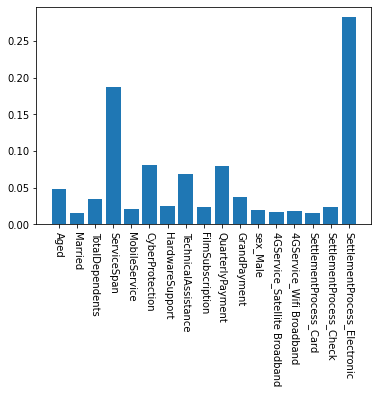

In [ ]:
plt.bar(x=X_train.columns, height=xgb_feat_imp)
plt.xticks(rotation=-90)
plt.show()

In [ ]:
# Random Forest
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.score(X_valid, y_valid)

0.7941640378548895